In [1]:
# There are 4 cells to evaluate:

# This file takes in the following parameters

path='/Users/markrosenberg/Documents/PhotoCalendar/Today/'
squareEdge=50
userInput=5

# then it reformulates them:
parameters=[squareEdge, userInput]

# The next single cell has the functions

# cell after that calls the main function

# cell after that displays it.



In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sys
from os import listdir
from datetime import date
from PIL import Image
%matplotlib inline
from matplotlib.colors import hsv_to_rgb
import datetime
from datetime import timedelta  
    
def getTimeStamp():
    date=datetime.datetime.now().strftime('%Y %m %d %H %M').split()
    return date

def getViewLevel():
    x=int(input('Type 0 to exit, 1 for year, 2 for month, 3 for week, 4 for day'))
    if x==1:
        print('Year')
    elif x==2:
        print('Month')
    elif x==3:
        print('Week')
    elif x==4:
        print('Day')
    return x

'''def addDays(weekdate, numDays):
    
    from datetime import timedelta  

    print datetime.now() + timedelta(days=1)  
    vector=weekdate
    return vector'''

def getSpecificInterval(currentTimestamp, viewLevel):
    year=int(currentTimestamp[0])
    month=int(currentTimestamp[1])
    day=int(currentTimestamp[2])
    hour=int(currentTimestamp[3])
    minute=int(currentTimestamp[4])
    weekday=int(np.mod(date(year,month,day).weekday()+1,7)) #0 is Sunday
    #weekDate=[year, month, day, 0, 0]
    #currentTimestamp minus weekday and discard hour, minute is Sunday
    #currentTimestamp minus weekday plus 7 discard hour, minute
    if viewLevel==1:
        lowerVector=[year, 0, 0, 0, 0]
        upperVector=[year+1, 0, 0, 0, 0]
        specificInterval=[lowerVector, upperVector]
    elif viewLevel==2:
        lowerVector=[year, month, 0, 0, 0]
        upperVector=[year, month+1, 0, 0, 0]
        specificInterval=[lowerVector, upperVector]
    elif viewLevel==4:
        lowerVector=[year, month, day, 0, 0]
        upperVector=[year, month, day+1, 0, 0]
        specificInterval=[lowerVector, upperVector]
    elif viewLevel==3:
        #date=datetime.datetime.now().strftime('%Y %m %d %H %M').split()
        currentTimestamp2=(datetime.datetime.now()+timedelta(days=-weekday)).strftime('%Y %m %d').split()
        currentTimestamp3=(datetime.datetime.now()+timedelta(days=-weekday+7)).strftime('%Y %m %d').split()
        currentTimestamp2b=[]
        for i in range(3):
            currentTimestamp2b.append(int(currentTimestamp2[i]))
        currentTimestamp3b=[]
        for i in range(3):
            currentTimestamp3b.append(int(currentTimestamp3[i]))
        lowerVector=currentTimestamp2b+[0]+[0]#addDays(weekdate, -weekday)
        upperVector=currentTimestamp3b+[0]+[0]#addDays(weekdate, -weekday+7)
        specificInterval=[lowerVector, upperVector]
    elif viewLevel==0:
        print('exit')
        specificInterval=[]
    return specificInterval #

def getBounds(specificInterval):
    lowerVector = specificInterval[0]
    upperVector = specificInterval[1]
    return lowerVector, upperVector

def convertTimeStamp2Scalar(timeStamp):
    timeScalar=int(timeStamp[0])
    return timeScalar

def convertDtTime2Scalar(dt):
    return timeScalar
                    
def compareLowerVector(timeStamp, lowerVector):
    #timeStamp: [year, month, day, hour, minute, weekday]
    #lowerVector: [year, month, day, hour, minute, second]
    condition_year=int(timeStamp[0])>=lowerVector[0]
    condition_month=int(timeStamp[1])>=lowerVector[1]
    condition_day=int(timeStamp[2])>=lowerVector[2]
    condition_hour=int(timeStamp[3])>=lowerVector[3]
    condition_minute=int(timeStamp[4])>=lowerVector[4]
    condition1 = condition_year and condition_month and condition_day and condition_hour and condition_minute
    return condition1

def combineConditions(conditions):
    [condition_year, condition_month, condition_day, condition_hour, condition_minute]=conditions
    if condition_year==True:
        condition2=True
    elif condition_month==True:
        condition2=True
    elif condition_day==True:
        condition2=True
    elif condition_hour==True:
        condition2=True
    elif condition_minute==True:
        condition2=True
    else:
        condition2=False
    return condition2

def compareUpperVector(timeStamp, upperVector):
    #timeStamp: [year, month, day, hour, minute, weekday]
    #upperVector: [year, month, day, hour, minute, second]
    condition_year=int(timeStamp[0])<upperVector[0]
    condition_month=int(timeStamp[1])<upperVector[1]
    condition_day=int(timeStamp[2])<upperVector[2]
    condition_hour=int(timeStamp[3])<upperVector[3]
    condition_minute=int(timeStamp[4])<upperVector[4]
    conditions=[condition_year, condition_month, condition_day, condition_hour, condition_minute]
    condition2 = combineConditions(conditions)
    return condition2  

def getIndicator(dataType, timeInfo, specificInterval):
    lowerVector, upperVector=getBounds(specificInterval)
    #lowerVector = [year, month, day, hour, minute, second]
    if dataType == 'image':
        timeStamp=timeInfo[0] #    timeStamp=dateVector=[year, month, day, hour, minute, weekday]
        #print(timeStamp) #[2018, 3, 2, 13, 41, 5]
        #'%Y %m %d %H %M %S' #interval current
        #timeScalar=convertTimeStamp2Scalar(timeStamp)
        condition1=compareLowerVector(timeStamp, lowerVector)#compareLowerBound(timeScalar, lowerBound)
        condition2=compareUpperVector(timeStamp, upperVector)#compareHigherBound(timeScalar, higherBound)
        if condition1 and condition2:
            indicator=True
        else: 
            indicator=False
    elif dataType == 'event':
        dtStart=timeInfo[0]
        dtEnd=timeInfo[1]
        rrule=timeInfo[2]
        #[dtStart, dtEnd]=timeInfo  #restructuredEvent=[[],[],[],[]] #dtstart, dtend, rrule, summary
        #dtStartScalar=convertDtTime2Scalar(dtStart)
        #dtEndScalar=convertDtTime2Scalar(dtEnd)
#        ['2018', '04', '17', '22', '00', '00']
            
        condition1a=compareLowerVector(dtEnd, lowerVector) # dtEndScalar > lowerBound
        condition1b=compareUpperVector(dtEnd, upperVector) #dtEndScalar <= higherBound
        condition1=(condition1a and condition1b)
        condition2a=compareLowerVector(dtStart, lowerVector) #dtStartScalar >= lowerBound
        condition2b=compareUpperVector(dtEnd, upperVector) #dtStartScalar < higherBound
        condition2=(condition2a and condition2b)
        if condition1 or condition2: # or it’s a really long event
            indicator=True
        else:
            indicator=False
    return indicator

def getListOfContentIndices(specificInterval, generalContentInformationList):
    listOfContentIndices=[]
    numEntries=len(generalContentInformationList)
    for i in range(numEntries):
        entry = generalContentInformationList[i] # entry=[absoluteIndex, dataType, fileName, timeInfo]
        dataType = entry[1]
        #if dataType=='event':
        #    print(entry) #listOfEvents_i=getEvents(eventFile)
        timeInfo = entry[3]
        indicator=getIndicator(dataType, timeInfo, specificInterval)
        if indicator==True:
            absoluteIndex=entry[0]
            listOfContentIndices.append(absoluteIndex) #i=absoluteIndex
            print(entry)
    return listOfContentIndices

def fileName2Image(absoluteFileName, sideLength):
    img = Image.open(absoluteFileName)
    size=sideLength,sideLength
    img=img.resize((size),Image.ANTIALIAS)
    img=np.array(img)/255
    return img

def fileName2Summary(fileName):
    '''path2="/Users/markrosenberg/Downloads/e413282345779601.ics"
    in_file = open(path2, 'r')
    for line in in_file.readlines():
        print(line[:7])
    SUMMARY:GatherDC Apr
    LOCATION:'''
    absoluteFileName=fileName
    infile = open(absoluteFileName, 'r')
    offsetSummary=7
    offsetLocation=8
    for line in infile.readlines():
        if line[0:offsetSummary] == 'SUMMARY':
            summary = line
        if line[0:offsetLocation] =='LOCATION':
            location = line
    return summary

def getCondensedInformation(listOfContentIndices, generalContentInformationList, sideLength):
    localDataStructure=[]
    numEvents=len(listOfContentIndices)
    for i in range(numEvents):
        #print('i='+str(i))
        index = listOfContentIndices[i] #i != index = absoluteIndex
        #print('index='+str(index))
        #print('len(generalContentInformationList)='+str(len(generalContentInformationList)))
        entry = generalContentInformationList[index] # entry=[absoluteIndex, dataType, fileName, timeInfo]
        absoluteIndex = entry[0]
        dataType = entry[1]
        fileName = entry[2]
        timeInfo = entry[3]
        contentLocalIndex = i
        if dataType == 'image':
            image = fileName2Image(fileName, sideLength)
            dataContent = [contentLocalIndex, timeInfo, image]
        elif dataType == 'event':
            summary = str(absoluteIndex) #fileName2Summary(fileName) ###
            dataContent = [contentLocalIndex, timeInfo, summary]
        entry=[absoluteIndex, dataType, dataContent]
        localDataStructure.append(entry)
    return localDataStructure

def preMakeCalendar():
    currentTimestamp=getTimeStamp()
    viewLevel=getViewLevel()
    specificInterval=getSpecificInterval(currentTimestamp, viewLevel)
    return specificInterval, viewLevel

def makeCalendar(generalContentInformationList, specificInterval):
    listOfContentIndices=getListOfContentIndices(specificInterval, generalContentInformationList)
    return listOfContentIndices

def incorporateViewLevel(backgroundImage, viewLevel):
    return backgroundImage

def getSimpleCoordinates(j, resolutionParity):
    #visualize as circle angles
    #complex number vector rotating. 
    #j=np.mod(-j+1,4)
    #resolutionParity=1-resolutionParity
    resolutionParity=0
    if resolutionParity==0:
        if j==0:
            x,y=[0,1]#[1,1]
        elif j==1:
            x,y=[0,0]#[0,1]
        elif j==2:
            x,y=[1,0]#[0,0]
        elif j==3:
            x,y=[1,1]#[1,0]
    elif resolutionParity==1:
        if j==0:
            x,y=[0,1]#[1,1]
        elif j==1:
            x,y=[1,1]#[0,1]
        elif j==2:
            x,y=[1,0]#[0,0]
        elif j==3:
            x,y=[0,0]#[1,0]
    return x,y

def getSquareMatrix_j_Coordinates(j, currentEdge, resolutionParity):
    edge=currentEdge
    x,y=getSimpleCoordinates(j, resolutionParity)
    x0=x*edge
    x1=x0+edge
    y0=y*edge
    y1=y0+edge
    return x0, x1, y0, y1

def percent2RGB(percent, alpha):
    shading1=np.mod(percent*alpha,1)
    shading2=np.mod(percent,1)
    shading=shading1*shading2
    hue=percent
    RGB=hueAndShading2RGB(hue, shading)
    return RGB

def makeIndicesSquare(viewLevel, backgroundEdge, sizingParameters, squareEdge):
    resolution=getResolution(sizingParameters)
    squareEdge=1
    baseEntity=np.zeros((squareEdge,squareEdge))
    squareMatrix=baseEntity
    a=0
    k_0,k_1,k_2,k_3=[0+a, -1+a, -1+a, -2+a]
    for i in range(resolution):
        resolutionParity=np.mod(i,2)
        powerOf4=4**i
        squareMatrix=np.rot90(np.fliplr(squareMatrix),-1)
        squareMatrix_a=np.rot90(squareMatrix+0*powerOf4, k_0)
        squareMatrix_b=np.rot90(np.fliplr(squareMatrix)+1*powerOf4, k_1)
        squareMatrix_c=np.rot90(np.fliplr(squareMatrix)+2*powerOf4, k_2)
        squareMatrix_d=np.rot90(squareMatrix+3*powerOf4, k_3)
        squareMatrixList=[squareMatrix_a, squareMatrix_b, squareMatrix_c, squareMatrix_d]
        currentEdge=getEdge(i)
        nextEdge=getEdge(i+1)*squareEdge
        squareMatrix=np.zeros((nextEdge,nextEdge))
        for j in range(4):
            squareMatrix_j_Coordinates=getSquareMatrix_j_Coordinates(j, currentEdge, resolutionParity)
            x0,x1,y0,y1= squareMatrix_j_Coordinates
            x0*=squareEdge
            x1*=squareEdge
            y0*=squareEdge
            y1*=squareEdge
            squareMatrix[x0:x1,y0:y1]=squareMatrixList[j]
    indicesMatrix=squareMatrix
    return indicesMatrix

def viewLevel2Alpha(viewLevel):
    if viewLevel==1: #year
        alpha=12
    elif viewLevel==2: #month
        alpha=30
    elif viewLevel==3: #week
        alpha=7
    else:
        alpha=1
    return alpha

def getSolidSquare(squareEdge, RGB):
    solidSquare=np.zeros((squareEdge, squareEdge, 3))
    for k in range(3):
        solidSquare[:,:,k]=RGB[k]
    return solidSquare

def makeBackgroundImage(viewLevel, backgroundEdge, sizingParameters, squareEdge, indicesMatrix):
    # step one, use indicesMatrix
    # convert indices to percent
    # each percent can be associated with an RGB
    # each percent/RGB can be associated with a solid square of length squareEdge
    # each index can be associated with standard coordinates
    # standard coordinates can be multiplied by squareEdge getting actual coordinates
    # the square tensor can be inserted into a larger tensor with edge backgroundEdge
    
    
    #parameters
    numSquares=int((backgroundEdge/squareEdge)**2)
    parameters=[squareEdge] #
    
    #percentMatrix=indicesMatrix/4*8resolution
    
    
    indicesArray=indicesMatrix2Array(indicesMatrix)
    resolution=getResolution(sizingParameters)
    backgroundEdge=squareEdge*2**resolution
    backgroundImage=np.zeros((backgroundEdge,backgroundEdge,3))
    alpha=viewLevel2Alpha(viewLevel)
    for index in range(numSquares):
        #print(index)
        #print(numSquares)
        coordinatesActual=index2Coordinates(index, numSquares, resolution, parameters, indicesArray)
        [x0,x1,y0,y1]=coordinatesActual
        percent=(index+0.5)/numSquares
        RGB=percent2RGB(percent, alpha)
        solidSquare=getSolidSquare(squareEdge, RGB)
        backgroundImage[x0:x1,y0:y1,:]=solidSquare
    return backgroundImage
        
    '''
    
    baseEntity=np.zeros((squareEdge,squareEdge,3))
    squareMatrix=baseEntity
    a=0
    k_0,k_1,k_2,k_3=[0+a, -1+a, -1+a, -2+a]
    for i in range(resolution):
        resolutionParity=np.mod(i,2)
        powerOf4=4**i
        squareMatrix=np.rot90(np.fliplr(squareMatrix),-1)
        squareMatrix_a=np.rot90(squareMatrix+0*powerOf4, k_0)
        squareMatrix_b=np.rot90(np.fliplr(squareMatrix)+1*powerOf4, k_1)
        squareMatrix_c=np.rot90(np.fliplr(squareMatrix)+2*powerOf4, k_2)
        squareMatrix_d=np.rot90(squareMatrix+3*powerOf4, k_3)
        squareMatrixList=[squareMatrix_a, squareMatrix_b, squareMatrix_c, squareMatrix_d]
        currentEdge=getEdge(i)
        nextEdge=getEdge(i+1)*squareEdge
        squareMatrix=np.zeros((nextEdge,nextEdge,3))
        for j in range(4):
            squareMatrix_j_Coordinates=getSquareMatrix_j_Coordinates(j, currentEdge, resolutionParity)
            x0,x1,y0,y1= squareMatrix_j_Coordinates
            x0*=squareEdge
            x1*=squareEdge
            y0*=squareEdge
            y1*=squareEdge
            squareMatrix[x0:x1,y0:y1,:]=squareMatrixList[j]



    percentMatrix=squareMatrix/4**resolution
    squareMatrixEdge0=np.shape(squareMatrix)[0]
    squareMatrixEdge1=np.shape(squareMatrix)[1]
    backgroundImage=np.zeros((squareMatrixEdge0,squareMatrixEdge1,3))
    for i in range(squareMatrixEdge0):
        print(i)
        for j in range(squareMatrixEdge1):
            percent=percentMatrix[i][j][0]
            RGB=percent2RGB(percent, alpha)
            for k in range(3):
                backgroundImage[i][j][k]=percent*RGB[k]
    #backgroundImage=percentMatrix*alpha
    #backgroundImage=np.ones((backgroundEdge, backgroundEdge,3))
    #backgroundImage=incorporateViewLevel(backgroundImage, viewLevel)
    return backgroundImage'''

def getCeilPowerOf4(numEvents):
    n=0
    while numEvents>4**n:
        n+=1
    return n

def getSizingParameters(localDataStructure, userInput):
    numEvents=len(localDataStructure)
    mostBasicInfo=getCeilPowerOf4(numEvents)
    #userInput=0
    sizingParameters=mostBasicInfo+userInput
    return sizingParameters

def getResolution(sizingParameters): #viewLevel
    # consider overlapping events.
    # consider a threshold
    # consider event duration
    n=sizingParameters
    resolution=n
    return resolution

def getBackgroundEdge(sizingParameters, squareEdge):
    resolution=getResolution(sizingParameters)
    backgroundEdge=squareEdge*2**resolution
    return backgroundEdge

def getBackgroundTemplate(viewLevel, sizingParameters, squareEdge):
    print('a1')
    backgroundEdge=getBackgroundEdge(sizingParameters, squareEdge)
    print('a2')
    indicesMatrix=makeIndicesSquare(viewLevel, backgroundEdge, sizingParameters, squareEdge)
    print('a3')
    backgroundImage=makeBackgroundImage(viewLevel, backgroundEdge, sizingParameters, squareEdge, indicesMatrix)
    print('a4')
    return backgroundImage, indicesMatrix

def getCoordinateIndex(percent, numSquares):
    coordinateIndex=np.floor(percent*numSquares)
    if coordinateIndex==numSquares: #shouldn’t occur if percent in [0,1)
        coordinateIndex==numSquares-1
    coordinateIndex=int(coordinateIndex) #
    return coordinateIndex

def getEdge(i):
    edge=2**i
    return edge

def getDefaultHilbertMatrix(resolution): #, parameters):
    
    
    '''resolution=getResolution(sizingParameters)
    backgroundEdge=squareEdge*2**resolution
    
    baseEntity=np.zeros((squareEdge,squareEdge,3))
    squareMatrix=baseEntity
    a=0
    k_0,k_1,k_2,k_3=[0+a, -1+a, -1+a, -2+a]
    for i in range(resolution):
        resolutionParity=np.mod(i,2)
        powerOf4=4**i
        squareMatrix=np.rot90(np.fliplr(squareMatrix),-1)
        squareMatrix_a=np.rot90(squareMatrix+0*powerOf4, k_0)
        squareMatrix_b=np.rot90(np.fliplr(squareMatrix)+1*powerOf4, k_1)
        squareMatrix_c=np.rot90(np.fliplr(squareMatrix)+2*powerOf4, k_2)
        squareMatrix_d=np.rot90(squareMatrix+3*powerOf4, k_3)
        squareMatrixList=[squareMatrix_a, squareMatrix_b, squareMatrix_c, squareMatrix_d]
        currentEdge=getEdge(i)
        nextEdge=getEdge(i+1)*squareEdge
        squareMatrix=np.zeros((nextEdge,nextEdge,3))
        for j in range(4):
            squareMatrix_j_Coordinates=getSquareMatrix_j_Coordinates(j, currentEdge, resolutionParity)
            x0,x1,y0,y1= squareMatrix_j_Coordinates
            x0*=squareEdge
            x1*=squareEdge
            y0*=squareEdge
            y1*=squareEdge
            squareMatrix[x0:x1,y0:y1,:]=squareMatrixList[j]
            
            '''
    baseEntity=np.zeros((1,1))
    squareMatrix=baseEntity
    a=0
    k_0,k_1,k_2,k_3=[0+a,-1+a,-1+a,-2+a]
    for i in range(resolution):
        resolutionParity=np.mod(i,2)
        powerOf4=4**i
        resolutionParity=np.mod(i,2)
        squareMatrix=np.rot90(np.fliplr(squareMatrix),-1)
        squareMatrix_a=np.rot90(squareMatrix+0*powerOf4, k_0)
        squareMatrix_b=np.rot90(np.fliplr(squareMatrix)+1*powerOf4, k_1)
        squareMatrix_c=np.rot90(np.fliplr(squareMatrix)+2*powerOf4, k_2)
        squareMatrix_d=np.rot90(squareMatrix+3*powerOf4, k_3)
        squareMatrixList=[squareMatrix_a, squareMatrix_b, squareMatrix_c, squareMatrix_d]
        currentEdge=getEdge(i)
        nextEdge=getEdge(i+1)
        squareMatrix=np.zeros((nextEdge,nextEdge))
        for j in range(4):
            squareMatrix_j_Coordinates=getSquareMatrix_j_Coordinates(j, currentEdge, resolutionParity)
            x0,x1,y0,y1= squareMatrix_j_Coordinates
            squareMatrix[x0:x1,y0:y1]=squareMatrixList[j]
    defaultSquareMatrixWithIndices=squareMatrix
    return defaultSquareMatrixWithIndices

def transformIndexMatrix2Array(squareMatrixWithIndices, numSquares):
    coordinateArray=np.zeros((numSquares,2))
    for i in range(np.shape(squareMatrixWithIndices)[0]):
        for j in range(np.shape(squareMatrixWithIndices)[1]):
            index=int(squareMatrixWithIndices[i][j])
            coordinateArray[index][0]=i
            coordinateArray[index][1]=j
    return coordinateArray

def index2Coordinates(index, numSquares, resolution, parameters, indicesArray):
    squareEdge=parameters[0]
    #HilbertOrMoore=parameters[1]
    #clockwiseOrientation=parameters[2]
    #offset=parameters[3] # in range 0,1,2,3 for right, up, left, down. #or in general a percent angle of circle.
    #edgeOffset=parameters[4] # generalized space-filling Hilbert offset.
    #variousOtherSpacingParameters=parameters[5]

    #squareMatrixWithIndices=getDefaultHilbertMatrix(resolution)#, parameters)
    #coordinateArray=transformIndexMatrix2Array(squareMatrixWithIndices, numSquares)

    [x,y]=indicesArray[0][index]
    #x=coordinateArray[int(index)][0]
    #y=coordinateArray[int(index)][1]
    x0=int(x*squareEdge)
    x1=int(x0+squareEdge)
    y0=int(y*squareEdge)
    y1=int(y0+squareEdge)
    coordinates=[x0, x1, y0, y1]
    return coordinates

def convertPercent2CoordinateInformation(percent, sizingParameters, indicesArray):
    n=sizingParameters
    resolution=n
    numSquares=4**n
    index=getCoordinateIndex(percent, numSquares)
    coordinates=index2Coordinates(index, numSquares, resolution, parameters, indicesArray)
    return coordinates

def getCoordinateInformation(timeInformation, sizingParameters):
    #numEvents=len(timeInformation)
    coordinateInformation=[]
    #for i in range(numEvents):
    timeInfo_i=timeInformation[i]
    percent_i=getPercentOfCalendar(timeInfo_i, sizingParameters)
    coordinateInfo_i=convertPercent2CoordinateInformation(percent_i, sizingParameters)
    coordinateInformation.append(coordinateInfo_i)
    return coordinateInformation

def getCoordinates(coordinateInfo_i):
    coordinates=coordinateInfo_i
    return coordinates

def getDtPercentOfCalendar(timeStamp, sizingParameters, viewLevel): ## more accuracy
    dateInfo=timeStamp
    for i in range(len(timeStamp)):
        dateInfo[i]=int(dateInfo[i])
    if viewLevel==1: #year
        percent = dateInfo[1]/12+dateInfo[2]/31*1/12+dateInfo[3]/(31*12*24)
    elif viewLevel==2: #month
        percent = dateInfo[2]/31+dateInfo[3]/(31*24)
    elif viewLevel==3: #week
        year=dateInfo[0]
        month=dateInfo[1]
        day=dateInfo[2]
        weekday=int(np.mod(date(year,month,day).weekday()+1,7))
        hour=dateInfo[3]
        minute=dateInfo[4]
        percent = weekday/7+hour/(24*7)+minute/(24*7*60) ##
    elif viewLevel==4: #day
        percent = dateInfo[3]/24
    #dateInfo[3]*1/7+dateInfo[4]*1/(7*24)+dateInfo[5]*1/(7*24*60)
    return percent

def makeRGBSquare(squareEdge, RGB):
    [R,G,B]=RGB
    image=np.zeros((squareEdge, squareEdge, 3))
    image[:,:,0]=R
    image[:,:,1]=G
    image[:,:,2]=B
    return image

def hueAndShading2RGB(hue, shading):
    if shading <0.5:
        value=1
        saturation=2*shading
    else:
        saturation=1
        value=1-(shading-0.5)*2
    hsv=[hue, saturation, value]
    RGB=hsv_to_rgb(hsv)
    return RGB

def getEventContent(indexStart, indexEnd, summary, squareEdge):
    eventContent = []
    numSquares = int(indexEnd-indexStart+1)
    shadings = []
    lowerShading = 0.15
    upperShading = 0.85
    interval = upperShading - lowerShading
    increment = interval / numSquares
    hues=[]
    hue=0.025
    for i in range(numSquares):
        shadings.append(lowerShading + increment*i)
        hues.append(hue)
    for i in range(numSquares):
        hue=hues[i]
        shading=shadings[i]
        RGB=hueAndShading2RGB(hue, shading)
        #print(RGB)
        image = makeRGBSquare(squareEdge, RGB) #np.ones((squareEdge, squareEdge, 3))*alpha[i]
        eventContent.append(image)
    return eventContent

def timeStamp2coordinates(timeStamp, sizingParameters, viewLevel, indicesArray):
    percent=getDtPercentOfCalendar(timeStamp, sizingParameters, viewLevel)
    coordinateInfo=convertPercent2CoordinateInformation(percent, sizingParameters, indicesArray)
    #index=getCoordinateIndex(percent, numSquares)
    #coordinateInfo=index2CoordinateInfo(index)
    return coordinateInfo

def dtPercent2Index(dtPercent,sizingParameters):
    n=sizingParameters
    resolution=n
    numSquares=4**n
    index=getCoordinateIndex(dtPercent, numSquares)
    return index

def info2coordinates(index, sizingParameters, parameters, indicesArray):
    resolution=sizingParameters
    n=resolution
    numSquares=4**n
    squareMatrixWithIndices=getDefaultHilbertMatrix(resolution)#, parameters)
    coordinateArray=transformIndexMatrix2Array(squareMatrixWithIndices, numSquares)
    coordinates=coordinateArray[index]#=index2Coordinates(index, numSquares, resolution, parameters, indicesArray)
    return coordinates

def updateImage(calendarImage, entry, sizingParameters, viewLevel, parameters, indicesArray):
    #squareEdge from sizingParameters?
    #entry = [absoluteIndex, dataType, dataContent]
    #dataContent = [contentLocalIndex, timeInfo, summary/image]
    dataType = entry[1]
    if dataType == 'event':
        #print('dataType==event')
        dataContent = entry[2]
        timeInfo = dataContent[1]
        #print(timeInfo)
        dtStart=timeInfo[0]
        dtEnd=timeInfo[1]
        dtPercentStart = getDtPercentOfCalendar(dtStart, sizingParameters, viewLevel)
        dtPercentEnd = getDtPercentOfCalendar(dtEnd, sizingParameters, viewLevel)
        #print(dtPercentStart)
        #print(dtPercentEnd)
        indexStart = dtPercent2Index(dtPercentStart, sizingParameters)
        indexEnd = dtPercent2Index(dtPercentEnd, sizingParameters)
        summary = dataContent[2]
        eventContent = getEventContent(indexStart, indexEnd, summary, squareEdge)
        #print('indices start end')
        #print(indexStart)
        #print(indexEnd)
        for i in range(indexEnd-indexStart+1):
            #print('i='+str(i))
            index=indexStart+i
            #print('index='+str(index))
            coordinates=info2coordinates(index, sizingParameters, parameters, indicesArray)
            x0,x1,y0,y1=coordinates
            #print(coordinates)
            indexContent=eventContent[i]
            #print('calendarShape='+str(np.shape(calendarImage)[0])+','+str(np.shape(calendarImage)[1]))
            calendarImage[x0:x1,y0:y1,:]= indexContent
    elif dataType == 'image':
        dataContent = entry[2]
        timeInfo = dataContent[1]
        timeStamp = timeInfo[0]
        coordinateInfo = timeStamp2coordinates(timeStamp, sizingParameters, viewLevel, indicesArray)
        x0,x1,y0,y1=coordinateInfo
        image = dataContent[2]
        calendarImage[x0:x1,y0:y1,:] = image
    return calendarImage

def indicesMatrix2Array(indicesMatrix):
    size=np.size(indicesMatrix)
    indicesArray=[]
    for i in range(size):
        indicesArray.append([])
    for i in range(np.shape(indicesMatrix)[0]):
        for j in range(np.shape(indicesMatrix)[1]):
            index=int(indicesMatrix[i][j])
            indicesArray[index]=[i,j]
    return indicesArray

def overlayData(backgroundImage, sizingParameters, localDataStructure, viewLevel, parameters, indicesMatrix):
    calendarImage=backgroundImage
    numContent=len(localDataStructure)
    indicesArray=indicesMatrix2Array(indicesMatrix)
    for i in range(numContent):
        entry=localDataStructure[i]
        dataContent=entry[2]
        dataType=entry[1]
        calendarImage=updateImage(calendarImage, entry, sizingParameters, viewLevel, parameters, indicesArray)
    return calendarImage

def makeCalendar2(localDataStructure, viewLevel, specificInterval, squareEdge, parameters, userInput):
    print('phase a')
    sizingParameters=getSizingParameters(localDataStructure, userInput)
    print('phase b')
    backgroundImage, indicesMatrix=getBackgroundTemplate(viewLevel, sizingParameters, squareEdge)
    print('phase c')
    imageTensor=overlayData(backgroundImage, sizingParameters, localDataStructure, viewLevel, parameters, indicesMatrix)
    print('phase d')
    return imageTensor

def path2fileList(path):
    listOfFileNames=listdir(path)
    return listOfFileNames

def getExtension(filename):
    words=filename.split('.')
    #print(words)
    extension=words[-1]
    return extension

def getDataType(extension):
    if extension=='PNG' or extension=='JPG' or extension=='jpg':
        dataType='image'
    elif extension=='ics':
        dataType='event'
    else:
        print(extension)
    return dataType

def filePath2date(filePath):
    date1=Image.open(filePath)._getexif()[36867]
    year,month,day,hour,minute=int(date1[:4]),int(date1[5:7]),int(date1[8:10]),int(date1[11:13]),int(date1[14:16])
    weekday=np.mod(date(year,month,day).weekday()+1,7)
    dateVector=[year, month, day, hour, minute, weekday]
    return dateVector

def dt2vector(dt):
    return [dt[:4], dt[4:6], dt[6:8], dt[9:11], dt[11:13], dt[13:15]]

def getEventTimeInfo(absoluteFileName):
    #path="/Users/markrosenberg/Downloads/e413282345779601.ics"
    path=absoluteFileName
    dtStartWordsIntList=[]
    dtEndWordsIntList=[]
    in_file = open(path, 'r')
    for line in in_file.readlines():
        if line[:8]=="DTSTART:":
            if line[8:12] not in ['1970', '2038']:
                dtStart=line[8:]
                dtStartWords=dt2vector(dtStart)
                dtStartWordsInt=[]
                for dtStartWord in dtStartWords:
                    dtStartWordsInt.append(int(dtStartWord))
                dtStartWordsIntList.append(dtStartWordsInt)
        elif line[:6]=="DTEND:":
            dtEnd=line[6:]
            dtEndWords=dt2vector(dtEnd)
            dtEndWordsInt=[]
            for dtEndWord in dtEndWords:
                dtEndWordsInt.append(int(dtEndWord))
            dtEndWordsIntList.append(dtEndWordsInt)
    in_file.close()
    #dtStartWordsInt=dtStartWordsIntList[-1]
    #dtEndWordsInt=dtEndWordsIntList[-1]
    #dtStartWordsIntList=[dtStartWordsInt]
    #dtEndWordsIntList=[dtEndWordsInt]   '
    return dtStartWordsIntList, dtEndWordsIntList

def getGeneralContentInformationList(path):
    generalContentInformationListImages=[]
    generalContentInformationListEvents=[]
    listOfFileNames=path2fileList(path)
    numFiles=len(listOfFileNames)
    if numFiles>0:
        absoluteIndexImage=-1
        absoluteIndexEvent=-1
        for i in range(numFiles):
            fileName=listOfFileNames[i]
            extension=getExtension(fileName)
            dataType=getDataType(extension)
            absoluteFileName=path+fileName #path ends with /
            if dataType == 'image':
                timeStamp = getImageTimeStamp(absoluteFileName)
                timeInfo=[timeStamp]
                absoluteIndexImage+=1
                entry=[absoluteIndexImage, dataType, absoluteFileName, timeInfo]
                generalContentInformationListImages.append(entry)
            elif dataType == 'event':
                listOfEvents_i=getEvents(absoluteFileName)
                listOfEvents_i=restructureEvents(listOfEvents_i)
                for j in range(len(listOfEvents_i)):
                    absoluteIndexEvent+=1
                    timeInfo=listOfEvents_i[j]
                    entry=[absoluteIndexEvent, dataType, absoluteFileName, timeInfo]
                    generalContentInformationListEvents.append(entry)
    return generalContentInformationListImages, generalContentInformationListEvents

def main(parameters, path):
    print('starting')
    parameters[0]=squareEdge
    #parameters[1]=imageIndex
    #parameters[2]=sideLength
    parameters[1]=userInput
    generalContentInformationListImages, generalContentInformationListEvents=getGeneralContentInformationList(path)
    print('phase1')
    specificInterval, viewLevel=preMakeCalendar()
    listOfContentIndicesImages=makeCalendar(generalContentInformationListImages, specificInterval)
    listOfContentIndicesEvents=makeCalendar(generalContentInformationListEvents, specificInterval)
    print('phase2')
    localDataStructureImages=getCondensedInformation(listOfContentIndicesImages, generalContentInformationListImages, squareEdge)
    print('phase3')
    a=len(localDataStructureImages)
    for i in range(len(listOfContentIndicesEvents)):
        listOfContentIndicesEvents[i][0]=a+i
    imageTensor=makeCalendar2(localDataStructureImages+listOfContentIndicesEvents, viewLevel, specificInterval, squareEdge, parameters, userInput)
    print('phase4')
    return imageTensor
















def main2(parameters):
    path = parameters[0]
    listOfAbsoluteFiles = path2absoluteFileList(path)
    listOfImageFiles, listOfEventFiles = separateListOfFiles(listOfAbsoluteFiles)
    listOfImageInfo = getImageInfo(listOfImageFiles)
    listOfEvents0 = getEventInfoAndContent(listOfEventFiles)
    listOfEvents = restructureEvents(listOfEvents0)
    specificInterval = 0 #askUserInput()
    imageTensor = makeCalendar(specificInterval, listOfImageInfo, listOfEvents, parameters)
    return 0

def path2absoluteFileList(path):
    listOfFiles = listdir(path)
    numFiles = len(listOfFiles)
    listOfAbsoluteFiles=[]
    for i in range(numFiles):
        file = listOfFiles[i]
        absoluteFile = path+file #/
        listOfAbsoluteFiles.append(absoluteFile)
    return listOfAbsoluteFiles

def separateListOfFiles(listOfAbsoluteFiles):
    numFiles = len(listOfAbsoluteFiles)
    listOfImageFiles = []
    listOfEventFiles = []
    for i in range(numFiles):
        absoluteFile = listOfAbsoluteFiles[i]
        extension = getExtension(absoluteFile)
        dataType = getDataType(extension)
        if dataType == 'image':
            listOfImageFiles.append(absoluteFile)
        elif dataType == 'event':
            listOfEventFiles.append(absoluteFile)
    return listOfImageFiles, listOfEventFiles

def getExtension(absoluteFile):
    words=absoluteFile.split('.')
    extension=words[-1]
    return extension

def getDataType(extension):
    if extension=='PNG' or extension=='JPG' or extension=='jpg':
        dataType='image'
    elif extension=='ics':
        dataType='event'
    else:
        print(extension)
    return dataType
    
def getImageInfo(listOfImageFiles):
    numImageFiles=len(listOfImageFiles)
    listOfImageInfo=[]
    for i in range(numImageFiles):
        absoluteImageFile=listOfImageFiles[i]
        imageTimeStamp=getImageTimeStamp(absoluteImageFile)
    return listOfImageInfo

def getImageTimeStamp(absoluteFile):
    date1 = Image.open(absoluteFile)._getexif()[36867]
    year, month, day, hour, minute = int(date1[:4]), int(date1[5:7]), int(date1[8:10]), int(date1[11:13]), int(date1[14:16])
    weekday = np.mod(date(year, month, day).weekday() + 1, 7)
    imageTimeStamp = [year, month, day, hour, minute, weekday]
    return imageTimeStamp

def getEventInfoAndContent(listOfEventFiles):
    numEventFiles = len(listOfEventFiles)
    listOfEvents=[]
    for i in range(numEventFiles):
        eventFile=listOfEventFiles[i]
        listOfEvents_i=getEvents(eventFile)
        listOfEvents+=listOfEvents_i
    return listOfEvents

def getEvents(eventFile):
    path=eventFile
    listOfEvents=[]
    indicator=0
    with open(path, 'r') as file:
        index=-1
        for line in file:
            index+=1
            if line=="BEGIN:VEVENT\n":
                newEvent=['','','','']
                indicator=1
            if indicator==1:
                if line[:7]=="DTSTART":
                    newEvent[0]=line
                elif line[:5]=="DTEND":
                    newEvent[1]=line
                elif line[:5]=="RRULE":
                    newEvent[2]=line
                elif line[:7]=="SUMMARY":
                    newEvent[3]=line
                #elif line[:11]=="DESCRIPTION":
                #    newEvent[4]=line
                elif line=="END:VEVENT\n":
                    listOfEvents.append(newEvent)
                    indicator=0
    return listOfEvents

def restructureEvents(listOfEvents0):
    numEvents=len(listOfEvents0)
    listOfEvents=[]
    for i in range(numEvents):
        event=listOfEvents0[i]
        restructuredEvent=[[],[],[],[]] #dtstart, dtend, rrule, summary
        dtStart=event[0]
        if dtStart[:7]=="DTSTART":
            word=(dtStart.split(':')[1])
            if dtStart[:8]=="DTSTART:":
                year=word[0:4]
                month=word[4:6]
                day=word[6:8]
                hour=word[9:11]
                minutes=word[11:13]
                seconds=word[13:15]
                dtVector=[year, month, day, hour, minutes, seconds]
            elif dtStart[:19]=="DTSTART;VALUE=DATE:":
                word=(dtStart.split(':')[1])
                year=word[0:4]
                month=word[4:6]
                day=word[6:8]
                hour='00'
                minutes='00'
                seconds='00'
                dtVector=[year, month, day, hour, minutes, seconds]
            elif dtStart.split('=')[0]=="DTSTART;TZID" :
                year=word[0:4]
                month=word[4:6]
                day=word[6:8]
                hour=word[9:11]
                minutes=word[11:13]
                seconds=word[13:15]
                dtVector=[year, month, day, hour, minutes, seconds]
            else:
                print(dtStart)
                dtVector=[]
            restructuredEvent[0]=dtVector
        dtEnd=event[1]
        if dtEnd[:5]=="DTEND":
            word=(dtEnd.split(':')[1])
            if dtEnd[:6]=="DTEND:":
                year=word[0:4]
                month=word[4:6]
                day=word[6:8]
                hour=word[9:11]
                minutes=word[11:13]
                seconds=word[13:15]
                dtVector=[year, month, day, hour, minutes, seconds]
            elif dtEnd[:17]=="DTEND;VALUE=DATE:":
                word=(dtStart.split(':')[1])
                year=word[0:4]
                month=word[4:6]
                day=word[6:8]
                hour='00'
                minutes='00'
                seconds='00'
                dtVector=[year, month, day, hour, minutes, seconds]
            elif dtEnd.split('=')[0]=="DTEND;TZID" :
                year=word[0:4]
                month=word[4:6]
                day=word[6:8]
                hour=word[9:11]
                minutes=word[11:13]
                seconds=word[13:15]
                dtVector=[year, month, day, hour, minutes, seconds]
            else:
                print(dtEnd)
                dtVector=[]
            restructuredEvent[1]=dtVector
        if event[2]!='':
            misc=[[],[]]
            rrule=event[2].split(':')[1]
            rruleWords=rrule.split(';')
            field=rruleWords[0].split('=')[0]
            value=rruleWords[0].split('=')[1]
            if value[:6]=='WEEKLY':
                value0='WEEKLY'
            elif value[:5]=='DAILY':
                value0='DAILY'
            elif value[:6]=='YEARLY':
                value0='YEARLY'
            misc[0]=[field, value0]
            if len(rruleWords)>1:
                for i in range(1,len(rruleWords)):
                    field=rruleWords[i].split('=')[0]
                    value=rruleWords[i].split('=')[1]
                    if field=='UNTIL':
                        word=value
                        year=word[0:4]
                        month=word[4:6]
                        day=word[6:8]
                        hour=word[9:11]
                        minutes=word[11:13]
                        seconds=word[13:15]
                        dtVector=[year, month, day, hour, minutes, seconds]
                        value0=dtVector
                        misc[1].append([field, value0])
                    elif field=='BYDAY':
                        days=value.split(',')
                        days[-1]=days[-1][0:2]
                        value0=days
                        misc[1].append([field, value0])
                    else: #count, wkst, interval  
                        value0=value
                        misc[1].append([field, value0])
            restructuredEvent[2]=misc
        field=event[3].split(':')[0]
        value0=event[3][8:]
        restructuredEvent[3]=[field,value0]
        listOfEvents.append(restructuredEvent)
    return listOfEvents


def overlayData(backgroundImage, sizingParameters, localDataStructure, viewLevel, parameters, indicesMatrix):
    calendarImage=backgroundImage
    numContent=len(localDataStructure)
    indicesArray=indicesMatrix2Array(indicesMatrix)
    for i in range(numContent):
        entry=localDataStructure[i]
        dataContent=entry[2]
        dataType=entry[1]
        calendarImage=updateImage(calendarImage, entry, sizingParameters, viewLevel, parameters, indicesArray)
    return calendarImage

def info2coordinates(index, sizingParameters, parameters, indicesArray):
    resolution=sizingParameters
    n=resolution
    numSquares=4**n
    coordinates=index2Coordinates(index, numSquares, resolution, parameters, indicesArray)
    return coordinates

def index2Coordinates(index, numSquares, resolution, parameters, indicesArray):
    squareEdge=parameters[0]
    #HilbertOrMoore=parameters[1]
    #clockwiseOrientation=parameters[2]
    #offset=parameters[3] # in range 0,1,2,3 for right, up, left, down. #or in general a percent angle of circle.
    #edgeOffset=parameters[4] # generalized space-filling Hilbert offset.
    #variousOtherSpacingParameters=parameters[5]

    #squareMatrixWithIndices=getDefaultHilbertMatrix(resolution)#, parameters)
    #coordinateArray=transformIndexMatrix2Array(squareMatrixWithIndices, numSquares)
    
    #print(index)
    #print(indicesArray)
    [x,y]=indicesArray[index]
    #x=coordinateArray[int(index)][0]
    #y=coordinateArray[int(index)][1]
    x0=int(x*squareEdge)
    x1=int(x0+squareEdge)
    y0=int(y*squareEdge)
    y1=int(y0+squareEdge)
    coordinates=[x0, x1, y0, y1]
    return coordinates

def getEventContent(indexStart, indexEnd, summary, squareEdge):
    eventContent = []
    numSquares = int(indexEnd-indexStart+1)
    shadings = []
    lowerShading = 0.15
    upperShading = 0.85
    interval = upperShading - lowerShading
    increment = interval / numSquares
    hues=[]
    hue=0.025
    for i in range(numSquares):
        shadings.append(lowerShading + increment*i)
        hues.append(hue)
    for i in range(numSquares):
        hue=hues[i]
        shading=shadings[i]
        RGB=hueAndShading2RGB(hue, shading)
        #print(RGB)
        image = makeRGBSquare(squareEdge, RGB) #np.ones((squareEdge, squareEdge, 3))*alpha[i]
        eventContent.append(image)
    return eventContent



def makeCalendar2(localDataStructure, viewLevel, specificInterval, squareEdge, parameters, userInput):
    print('phase a')
    sizingParameters=getSizingParameters(localDataStructure, userInput)
    print('phase b')
    backgroundImage, indicesMatrix=getBackgroundTemplate(viewLevel, sizingParameters, squareEdge)
    print('phase c')
    imageTensor=overlayData(backgroundImage, sizingParameters, localDataStructure, viewLevel, parameters, indicesMatrix)
    print('phase d')
    return imageTensor



def getDtPercentOfCalendar(timeStamp, sizingParameters, viewLevel): ## more accuracy
    dateInfo=timeStamp
    #print(dateInfo)
    for i in range(len(timeStamp)):
        dateInfo[i]=int(dateInfo[i])
    if viewLevel==1: #year
        dateInfo[1]=dateInfo[1]-1
        dateInfo[2]=dateInfo[2]-1
        percent = dateInfo[1]/12+dateInfo[2]/31*1/12+dateInfo[3]/(31*12*24)
    elif viewLevel==2: #month
        dateInfo[1]=dateInfo[1]-1
        dateInfo[2]=dateInfo[2]-1
        percent = dateInfo[2]/31+dateInfo[3]/(31*24)
    elif viewLevel==3: #week
        year=dateInfo[0]
        month=dateInfo[1]
        day=dateInfo[2]
        weekday=int(np.mod(date(year,month,day).weekday()+1,7))
        hour=dateInfo[3]
        minute=dateInfo[4]
        percent = weekday/7+hour/(24*7)+minute/(24*7*60) ##
    elif viewLevel==4: #day
        percent = dateInfo[3]/24
    #dateInfo[3]*1/7+dateInfo[4]*1/(7*24)+dateInfo[5]*1/(7*24*60)
    return percent

def updateImage(calendarImage, entry, sizingParameters, viewLevel, parameters, indicesArray):
    #squareEdge from sizingParameters?
    #entry = [absoluteIndex, dataType, dataContent]
    #dataContent = [contentLocalIndex, timeInfo, summary/image]
    dataType = entry[1]
    if dataType == 'event':
        #print(entry)
        #print('dataType==event')
        dataContent = entry[2]
        timeInfo = dataContent[1]
        #print(timeInfo)
        dtStart=timeInfo[0]
        dtEnd=timeInfo[1]
        dtPercentStart = getDtPercentOfCalendar(dtStart, sizingParameters, viewLevel)
        dtPercentEnd = getDtPercentOfCalendar(dtEnd, sizingParameters, viewLevel)
        #print(dtPercentStart)
        #print(dtPercentEnd)
        indexStart = dtPercent2Index(dtPercentStart, sizingParameters)
        indexEnd = dtPercent2Index(dtPercentEnd, sizingParameters)
        summary = dataContent[2]
        eventContent = getEventContent(indexStart, indexEnd, summary, squareEdge)
        #print('indices start end')
        #print(indexStart)
        #print(indexEnd)
        for i in range(indexEnd-indexStart+1):
            #print('i='+str(i))
            index=indexStart+i
            #print('index='+str(index))
            coordinates=info2coordinates(index, sizingParameters, parameters, indicesArray)
            x0,x1,y0,y1=coordinates
            #print(coordinates)
            indexContent=eventContent[i]
            #print('calendarShape='+str(np.shape(calendarImage)[0])+','+str(np.shape(calendarImage)[1]))
            calendarImage[x0:x1,y0:y1,:]= indexContent
    elif dataType == 'image':
        dataContent = entry[2]
        timeInfo = dataContent[1]
        timeStamp = timeInfo[0]
        coordinateInfo = timeStamp2coordinates(timeStamp, sizingParameters, viewLevel, indicesArray)
        x0,x1,y0,y1=coordinateInfo
        image = dataContent[2]
        calendarImage[x0:x1,y0:y1,:] = image
    return calendarImage


    
def getCondensedInformationEvents(listOfContentIndices, generalContentInformationList, sideLength):
    localDataStructure=[]
    numEvents=len(listOfContentIndices)
    for i in range(numEvents):
        #print('i='+str(i))
        print(i)
        print(listOfContentIndices)
        index = listOfContentIndices[i] #i != index = absoluteIndex
        #print('index='+str(index))
        #print('len(generalContentInformationList)='+str(len(generalContentInformationList)))
        entry = generalContentInformationList[index] # entry=[absoluteIndex, dataType, fileName, timeInfo]
        absoluteIndex = entry[0]
        dataType = entry[1]
        fileName = entry[2]
        timeInfo = entry[3]
        contentLocalIndex = i
        if dataType == 'image':
            image = fileName2Image(fileName, sideLength)
            dataContent = [contentLocalIndex, timeInfo, image]
        elif dataType == 'event':
            #summary = str(absoluteIndex) #fileName2Summary(fileName) ###
            dataContent = [contentLocalIndex, timeInfo, timeInfo]
        entry=[absoluteIndex, dataType, dataContent]
        localDataStructure.append(entry)
    return localDataStructure

def main(parameters, path):
    print('starting')
    parameters[0]=squareEdge
    #parameters[1]=imageIndex
    #parameters[2]=sideLength
    parameters[1]=userInput
    generalContentInformationListImages, generalContentInformationListEvents=getGeneralContentInformationList(path)
    print('phase1')
    specificInterval, viewLevel=preMakeCalendar()
    #print(generalContentInformationListEvents[0])
    #print(generalContentInformationListImages[0])
    listOfContentIndicesImages=makeCalendar(generalContentInformationListImages, specificInterval)
    listOfContentIndicesEvents=makeCalendar(generalContentInformationListEvents, specificInterval)
    print('phase2')
    #print(listOfContentIndicesEvents)
    localDataStructureImages=getCondensedInformation(listOfContentIndicesImages, generalContentInformationListImages, squareEdge)
    localDataStructureEvents=getCondensedInformationEvents(listOfContentIndicesEvents, generalContentInformationListEvents, squareEdge)
    print('phase3')
    #print(localDataStructureImages[0])
    
    #print(listOfContentIndicesEvents[0])
#    print(localDataStructureEvents[0])
    a=len(localDataStructureImages)
    for i in range(len(localDataStructureImages)):
        localDataStructureImages[i][0]=a+i
    imageTensor=makeCalendar2(localDataStructureEvents+localDataStructureImages, viewLevel, specificInterval, squareEdge, parameters, userInput)
    print('phase4')
    return imageTensor


def getIndicator(dataType, timeInfo, specificInterval):
    lowerVector, upperVector=getBounds(specificInterval)
    #lowerVector = [year, month, day, hour, minute, second]
    if dataType == 'image':
        timeStamp=timeInfo[0] #    timeStamp=dateVector=[year, month, day, hour, minute, weekday]
        #print(timeStamp) #[2018, 3, 2, 13, 41, 5]
        #'%Y %m %d %H %M %S' #interval current
        #timeScalar=convertTimeStamp2Scalar(timeStamp)
        condition1=compareLowerVector(timeStamp, lowerVector)#compareLowerBound(timeScalar, lowerBound)
        condition2=compareUpperVector(timeStamp, upperVector)#compareHigherBound(timeScalar, higherBound)
        if condition1 and condition2:
            indicator=True
        else: 
            indicator=False
    elif dataType == 'event':
        dtStart=timeInfo[0]
        dtEnd=timeInfo[1]
        rrule=timeInfo[2]
        print('ok')
        print(timeInfo)
        if rrule==[]:
            #[dtStart, dtEnd]=timeInfo  #restructuredEvent=[[],[],[],[]] #dtstart, dtend, rrule, summary
            #dtStartScalar=convertDtTime2Scalar(dtStart)
            #dtEndScalar=convertDtTime2Scalar(dtEnd)
    #        ['2018', '04', '17', '22', '00', '00']

            condition1a=compareLowerVector(dtEnd, lowerVector) # dtEndScalar > lowerBound
            condition1b=compareUpperVector(dtEnd, upperVector) #dtEndScalar <= higherBound
            condition1=(condition1a and condition1b)
            condition2a=compareLowerVector(dtStart, lowerVector) #dtStartScalar >= lowerBound
            condition2b=compareUpperVector(dtStart, upperVector) #dtStartScalar < higherBound ##
            condition2=(condition2a and condition2b)
            if condition1 or condition2: # or it’s a really long event
                indicator=True
            else:
                indicator=False
        else:
            indicator=False
        print(indicator)
    return indicator

def getListOfContentIndices(specificInterval, generalContentInformationList): 
    listOfContentIndices=[]
    numEntries=len(generalContentInformationList)
    for i in range(numEntries):
        entry = generalContentInformationList[i] # entry=[absoluteIndex, dataType, fileName, timeInfo]
        dataType = entry[1]
        #if dataType=='event':
        #    print(entry) #listOfEvents_i=getEvents(eventFile)
        timeInfo = entry[3]
        indicator=getIndicator(dataType, timeInfo, specificInterval)
        if indicator==True:
            absoluteIndex=entry[0]
            listOfContentIndices.append(absoluteIndex) #i=absoluteIndex
    return listOfContentIndices


def compareUpperVector(timeStamp, upperVector):
    #timeStamp: [year, month, day, hour, minute, weekday]
    #upperVector: [year, month, day, hour, minute, second]
    condition_year=int(timeStamp[0])<int(upperVector[0])
    print(condition_year)
    #print(int(timeStamp[0]))
    #print(upperVector[0])
    print('now here')
    condition_month=int(timeStamp[1])<int(upperVector[1])
    condition_day=int(timeStamp[2])<int(upperVector[2])
    condition_hour=int(timeStamp[3])<int(upperVector[3])
    condition_minute=int(timeStamp[4])<int(upperVector[4])
    conditions=[condition_year, condition_month, condition_day, condition_hour, condition_minute]
    condition2 = combineConditions(conditions)
    return condition2  

def getTimeStamp():
    date=datetime.datetime.now().strftime('%Y %m %d %H %M').split()
    date[1]='03'
    return date

def getCoordinateIndex(percent, numSquares):
    coordinateIndex=np.floor(percent*numSquares)
    if coordinateIndex==numSquares: #shouldn’t occur if percent in [0,1)
        coordinateIndex==numSquares-1
    coordinateIndex=int(coordinateIndex) #
    return coordinateIndex




def getGeneralContentInformationList(path):
    generalContentInformationListImages=[]
    generalContentInformationListEvents=[]
    listOfFileNames=path2fileList(path)
    numFiles=len(listOfFileNames)
    if numFiles>0:
        absoluteIndexImage=-1
        absoluteIndexEvent=-1
        for i in range(numFiles):
            fileName=listOfFileNames[i]
            extension=getExtension(fileName)
            dataType=getDataType(extension)
            absoluteFileName=path+fileName #path ends with /
            if dataType == 'image':
                timeStamp = getImageTimeStamp(absoluteFileName)
                timeInfo=[timeStamp]
                absoluteIndexImage+=1
                entry=[absoluteIndexImage, dataType, absoluteFileName, timeInfo]
                generalContentInformationListImages.append(entry)
            elif dataType == 'event':
                listOfEvents_i=getEvents(absoluteFileName)
                listOfEvents_i=restructureEvents(listOfEvents_i)
                for j in range(len(listOfEvents_i)):
                    absoluteIndexEvent+=1
                    timeInfo=listOfEvents_i[j]
                    entry=[absoluteIndexEvent, dataType, absoluteFileName, timeInfo]
                    generalContentInformationListEvents.append(entry)
    return generalContentInformationListImages, generalContentInformationListEvents






In [1]:
# call main function

imageTensor=main(parameters, path)
print('phase5')




NameError: name 'main' is not defined

phase6
phase7


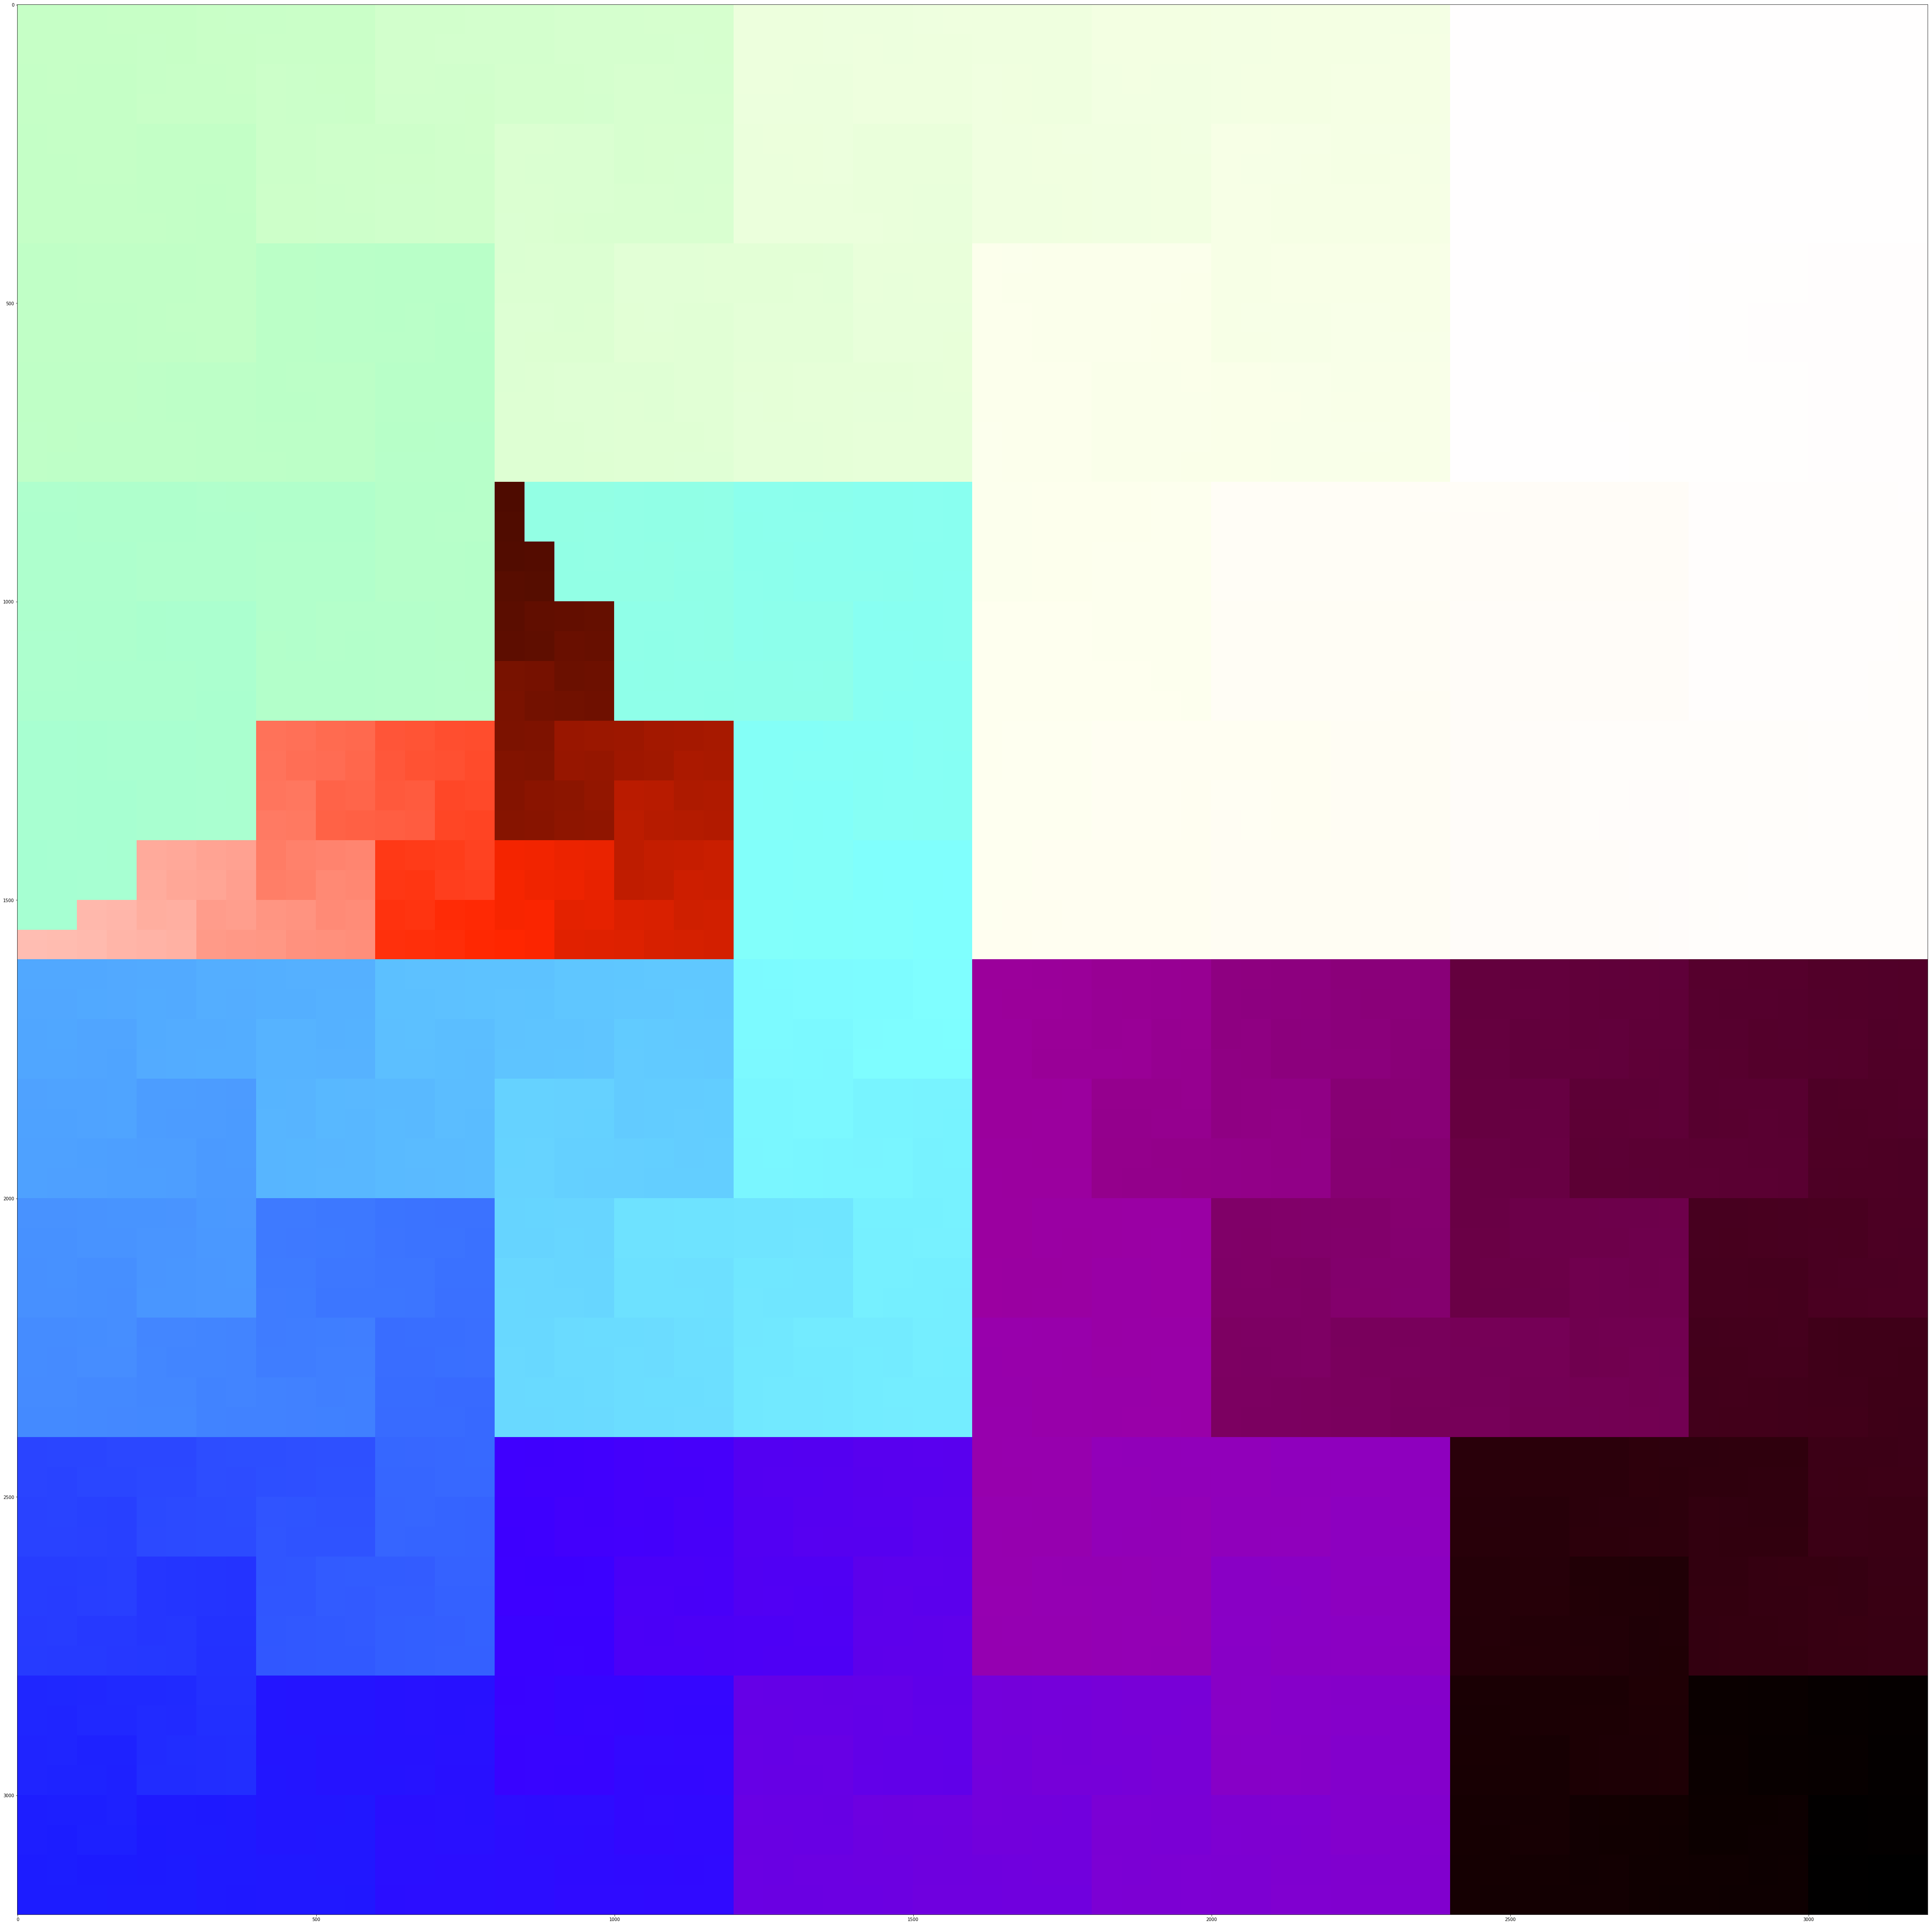

In [6]:
# display output

plt.figure(figsize=(80,80))
print('phase6')
plt.imshow(imageTensor)#,extent=[0,1,0,1])
print('phase7')